## The implementation of the novel data augmentation technique of fencemask.

#### [1] P. Li, X. Li, and X. Long, FenceMask: A Data Augmentation Approach for Pre-extracted Image Features. 2020.

In [2]:
from google.colab import drive
import cv2
import numpy as np
import torch
import torchvision
import pandas
from PIL import Image
import requests
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
!pip install opencv==4.5.4

ERROR: Could not find a version that satisfies the requirement opencv==4.5.4 (from versions: none)
ERROR: No matching distribution found for opencv==4.5.4


In [ ]:
#image = Image(filename="/content/oie_5181629QcL929KT-transformed (2).jpeg", width = 100, height = 100)
cb_img = cv2.imread('/content/oie_5181629QcL929KT-transformed (2).jpeg', cv2.IMREAD_COLOR) #

# Implementation of facemask

<class 'numpy.ndarray'>


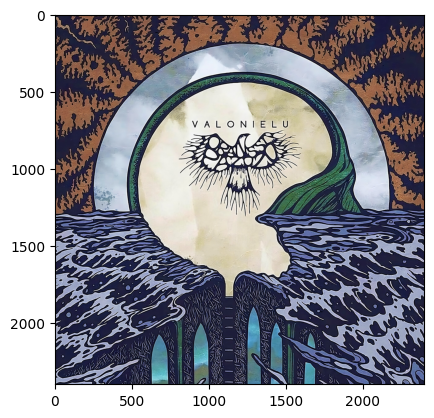

In [ ]:
#Display the image
img_rgb = cb_img[:,:,::-1]
plt.imshow(img_rgb)
print(type(img_rgb))

In [ ]:
import cv2
import numpy as np
import random

def perform_fencemask(im, w_min=5, w_max=15, g_min=140, g_max=200, F=0):
    theta_x = random.choice(range(1, 11))
    theta_y = random.choice(range(1, 11))
    g_x, g_y = random.choice(range(g_min, g_max + 1)), random.choice(range(g_min, g_max + 1))
    w_x, w_y = random.choice(range(w_min, w_max + 1)), random.choice(range(w_min, w_max + 1))
    # print("Widths of the untouched parts:", g_x, g_y)
    # print("Widths of the black lines:", w_x, w_y)
    # print("Random rotation by:", theta_x, theta_y)

    img_new = np.ascontiguousarray(im, dtype=np.uint8)

    height, width = img_new.shape[:2]
    #drawing the vertical lines
    h_x = random.choice(range(1, int(height*0.05)+1))
    startPoint = (h_x, height-1)
    x1 = 0; y1 = 0



    endPoint = (x1, y1)
    # endPoint = (int(height * np.tan(np.deg2rad(theta_x))), height)
    color = (0, 0, 0)  # Black color

    for i in range (0, int(width/(g_x))):

      startPoint = (int(h_x + i*g_x), 0)
      #  = int(height * np.tan(np.deg2rad(theta_x)))
      endPoint = (int(height * np.tan(np.deg2rad(theta_x))) + i*(g_x) + h_x, height)
      cv2.line(img_new, startPoint, endPoint, color, w_x)


    h_y = random.choice(range(1, int(height*0.005)+1))
    for i in range(0, int(width/(g_y))):

      startPoint = (0, int(h_y + i*g_y))
      endPoint = (int(max(width, h_y / np.tan(np.deg2rad(theta_y)) + i*(g_y) + h_y)), i*(g_y))
      cv2.line(img_new, startPoint, endPoint, color, w_x)

    # h_y = random.choice(range(1, int(height*0.1)+1))


    return (img_new)


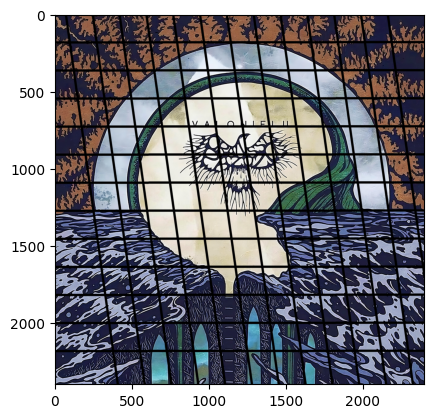

In [ ]:
augmented = perform_fencemask(img_rgb)
plt.imshow(augmented)



In [ ]:
print(img_rgb.shape)

'\n  logic:\n    compute the distances between the horizontal parallel lines to be drawn.\n      horizontal: gx\n      vertical: gy\n    compute the thickness of the lines to be drawn.\n      horizontal: wx\n      vertical: wy\n    find the starting point to draw the first vertical and horizontal lines.\n      Horizontal: find some random y intercept and draw a line such that it ends at the x intercept for the theta x value.\n                  Also find the angle required for the horizontal line to actually touch the y intercept.\n                  If our theta x is less than the threshold angle: the second point for the line is bound by the size of the image.\n      Vertical: same thing\n        start at the bottom right corner preferably.\n        Find the random angle.\n        Find the random offset for the x intercept (considering x axis is at the biottom of the image.)\n        Calculate threshold angle again.\n        If the predicted y intercept exceeds image height, plot till 